In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('data/Uber Request Data.csv')

In [3]:
# see how many rows and columns the data has
df.shape

(6745, 6)

In [4]:
# see how the data looks like
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
# We need to convert timestamp columns to pandas timestamp 
df['request_time'] = pd.to_datetime(df['Request timestamp'], dayfirst=True)

In [7]:
df['drop_time'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True)

In [8]:
df.loc[:,'day'] = pd.DatetimeIndex(df['request_time']).day
df.loc[:,'dayofweek'] = pd.DatetimeIndex(df['request_time']).dayofweek
df.loc[:,'hour'] = pd.DatetimeIndex(df['request_time']).hour

In [9]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_time,drop_time,day,dayofweek,hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,11,0,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,11,0,17
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,12,1,9
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,12,1,21
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,13,2,8


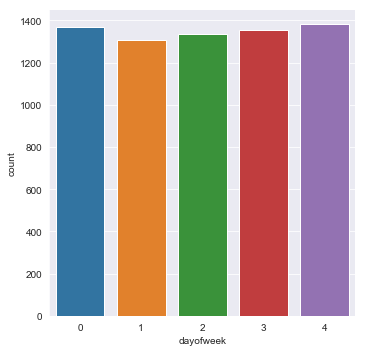

In [35]:
sns.set_style(style='darkgrid')
sns.catplot(x = 'dayofweek', kind = 'count', data = df)

In [12]:
df.groupby('dayofweek').count()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_time,drop_time,day,hour
dayofweek,,,,,,,,,,
0,1367,1367,863,1367,1367,601,1367,601,1367,1367
1,1307,1307,802,1307,1307,562,1307,562,1307,1307
2,1337,1337,847,1337,1337,577,1337,577,1337,1337
3,1353,1353,782,1353,1353,530,1353,530,1353,1353
4,1381,1381,801,1381,1381,561,1381,561,1381,1381


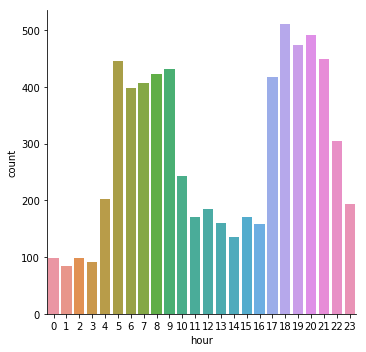

In [23]:
sns.catplot(x = 'hour', kind = 'count', data = df)